# Problem set 1: Financial Frictions, Liquidity and the Business Cycle.

This notebook sums up relevant information on the setup for the exercises. If further suggests what to think about, before going to exercise classes. The solution follows from "PS1.ipynb".

# Exercise 3.5 in JT (The Theory of Corporate Finance)

Consider the continuous the continuous investment model with decreasing returns to scale outlined in chapter 3 of JT. The core of the model is as follows:
- Let $I\in[0, \infty)$ be the level of investment in a given project.
- Entrepreneur proposes a project. If successful the project generates income $R(I)$; if not the project generates $0$.
- The probability of success depends on the behavior of the entrepreneur. If E behaves $(b)$ then probability of success is $p_H\in(0,1)$. If E does not behave $(nb)$ then the probability of success is $p_L$ where $0\leq p_L<p_H$. 
- The entrepreneur has an incentive to not behave $(nb)$, as he receives $BI$ in private benefits in this case.
- The entrepreneur is endowed with A in assets. 
- No investment project is profitable, if entrepreneur chooses not to behave. 
- The entrepreneur's technology obeys the following conditions:
    1. Positive, but decreasing returns to investments: $R'(I)>0, R''(I)<0$. 
    2. *Regularity condition 1:* Under perfect information a positive investment level would be optimal, i.e. $R'(0)>1/p_H$. 
    3. *Regularity condition 2:* Under perfect information a finite level of investment is optiaml, i.e. $ lim_{I\rightarrow \infty} R'(I) < 1/p_H$. 
- Assume perfect competition between lenders.
- We will consider loan agreements where the entrepreneur *pledges income* $R(I)-R_b(I)$, to the lender. This leaves the entrepreneur with $R_b(I)$ if the project is successful.


### Suggestions before exercise class:

1. Write up the utility for an entrepreneur, in the case where he behaves $(u_b)$ and in the case where he does not $(u_{nb})$.
2. Write up the *incentive compatibility constraint* (IC) stating what level of $R_b(I)$ is needed, for the entrepreneur to choose to behave.
3. Write up the *individual rationality constraint* (IR) for the lender, ensuring that he will agree to the loan contract.
4. What does the *perfect competition* amongst lenders imply, for the contract the entrepreneur will offer? 
5. Given that lenders are profit maximizing, what does this imply for the level $R_b(I)$ in the loan contract? (Hint: Think about the (IC) constraint).

# Exercise 6.1 in JT: Privately known private benefit and market breakdown

Let us start with a brief outline of the setup (from section 6.2), compared to exercise 3.5 (a lot of is the same, will not be repeated here):

* Two types of entrepreneurs: Good and bad types with private benefits of not behaving $B_H>B_L$. (good type has $B_L$)
* No equity (A=0),
* Investment is not continuous, but either 0 or I.
* Investment is either successfull (return R) or not (return 0).
* Capital markets put probability $\alpha\in(0,1)$ on type 'good' and $1-\alpha$ on type 'bad'. 
* Regularity conditions:

$$ \begin{align}
    p_H\left(R-\dfrac{B_H}{\Delta p}\right)<I<p_H\left(R-\dfrac{B_L}{\Delta p}\right), && \text{and} && p_LR<I.
\end{align} $$

Recall that the IC condition for an entrpreneur was **behave if**: $\Delta p R_b \geq B$.

The regularity conditions thus state that:
1. It is not profitable for lenders to invest in project with 'bad' entrepreneurs **and** making sure that they behave. (first inequality)
2. It is profitable to invest in 'good type' entrepreneur **and** making sure that he behaves (second inequality).
3. It is not profitable to invest in **any** project, where the entrepreneur mis-behaves (third inequality).


### Suggestions before exercise class:

1. Interpret the three regularity conditions (the three inequalities). 
2. If the first inequality holds and $R_b=B_H\Delta p$, what will the two entrepreneurs do (behave/not behave)? When negotiating contract with lender, what will the two types have an incentive to reveal about their type?
3. Same scenario for the second inequality?

# Exercise 6.2 in JT: More on pooling in credit markets.

Compared to before, alter the setup as follows:

* Continuum of types instead of good/bad. For entrepreneur $i$ the value $B_i$ is distributed according to the CDF function $H(B)$, with support on $[0, \bar{B}]$
* Monopoly lender offers credit to borrowers (entrepreneurs).

The lender offers $R_b$ for a successfull investment, otherwise 0. Borrower $i$ then behaves **if** the IC constraint holds: $B_i\leq \Delta p R_b$. The expected profits from offering the contract is then defined by:


$$\begin{align} 
    \pi(R_b) = H\big(\Delta p R_b\big)p_H(R-R_b)+\left[1-H\big(\Delta p R_b\big)\right] p_L(R-R_b)-I, \tag{Profits}
\end{align} $$

where $H(\Delta p R_b)$ measures the share of borrowers that behave, i.e. with $B_i<\Delta R_b$. From this note:

* The share of high-quality borrowers increase with $R_b$ (bad types start to behave).
* Same dynamics as before: Adverse selection reduces quality of lending, induces cross-subsidies between types.

### Suggestions before exercise class:

Make sure you understand the profit function. You can experiment with the profit function by changing the parameters in the cell below and run (shift+Enter) that cell along with the next one with the graphs.  

In [8]:
LowerBound = 0
UpperBound = 10 
N = 100
x = np.linspace(LowerBound, UpperBound, N)
pH = 0.9
pL = 0.5
R = 10
I = 2
rv = stats.uniform(loc=LowerBound, scale=UpperBound-LowerBound)
Exp_profits = rv.cdf(x)*pH*(R-x)+(1-rv.cdf(x))*pL*(R-x)-I
def prof_func(y):
    return rv.cdf(y)*pH*(R-y)+(1-rv.cdf(y))*pL*(R-y)-I
# For what value of B does the profits cross zero?
Zero_profits = optimize.newton(prof_func, 0)
print(Zero_profits)

7.5


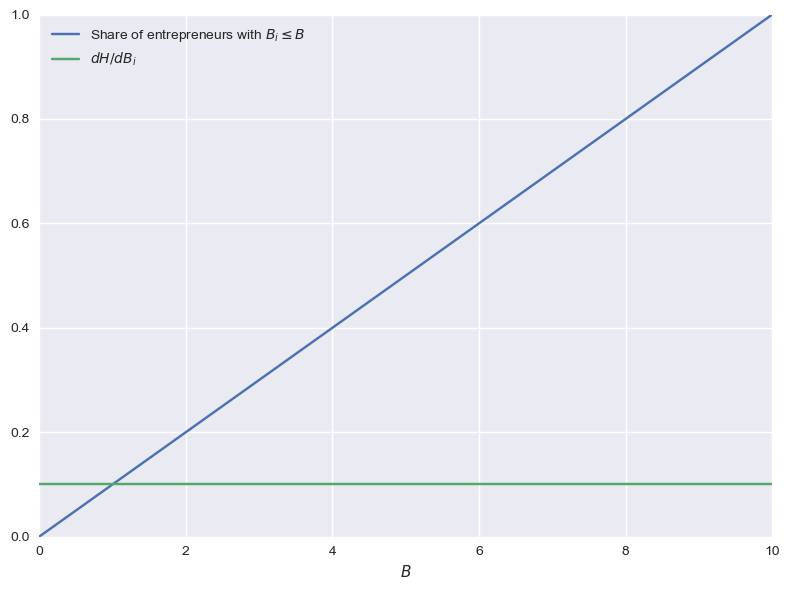

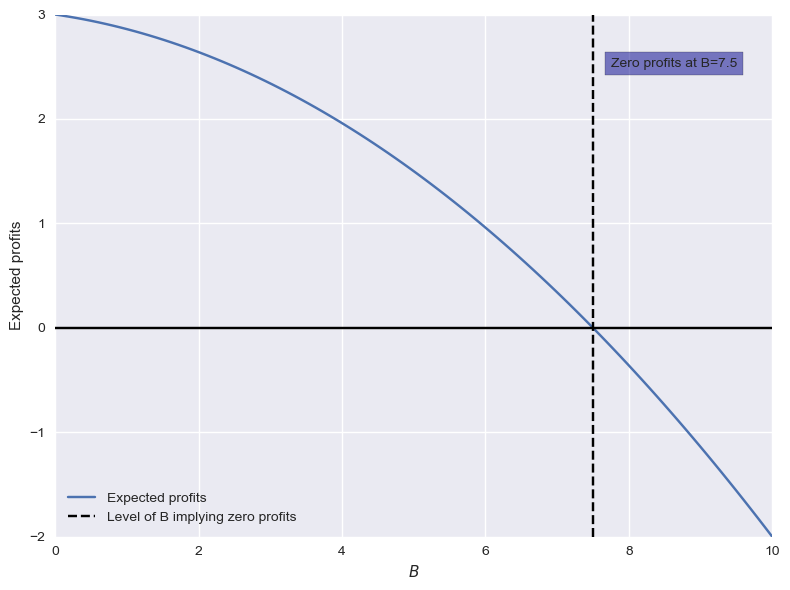

In [9]:
fig = plt.figure(frameon=False, figsize=(8, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, rv.cdf(x))
ax.plot(x, rv.pdf(x))
ax.set_xlim([LowerBound, UpperBound])
ax.set_ylim([0, 1])

# Labels:
ax.set_xlabel('$B$')
#ax.set_ylabel('Share of entrepreneurs with $B_i\leq B$')
plt.legend(('Share of entrepreneurs with $B_i\leq B$', '$dH/dB_i$'),
           loc='upper left')

# Add a cool layout
fig.tight_layout()

fig2 = plt.figure(frameon=False, figsize=(8, 6), dpi=100)
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(x,Exp_profits)
ax2.set_xlim([LowerBound, UpperBound])
ax2.set_ylim([math.floor(min(Exp_profits)), math.ceil(max(Exp_profits))])
ax2.set_xlabel('$B$') 
ax2.set_ylabel('Expected profits')
plt.axvline(x=Zero_profits, color='k', linestyle='--')
plt.axhline(y=0, color='k')

plt.legend(('Expected profits' , 'Level of B implying zero profits' ),
          loc='lower left')
plt.text(Zero_profits+0.25, (math.ceil(max(Exp_profits))-math.floor(min(Exp_profits)))/2, 'Zero profits at B='+str(Zero_profits), bbox=dict(facecolor='darkblue', alpha=0.5))

fig2.tight_layout()

# Exercise 13.1 JT: Improved governance

The setup in this exercise:

* Two period model, $t=0,1$.
* Continuum of entrepreneurs with initial wealth $(A)$ distributed with the CDF $G(A)$ with support on $[0,I]$.
* At time $t=0$: Entrepreneurs can invest $I$ and borrow $(I-A)$ or invest in other firms.
* Entrepreneurs are risk neutral and thus have utility $u_e=c_0+c_1$.
* As before: Receive $R$ is investment is successful, with probability $p_H$ if entrepreneur behaves or $p_L$ if he shirks (misbehaves). Shirking yields private benefits of $B$.
* Now add consumers: Behavior results in an increasing savings function $S(r)$, with $S(r)=0$ for $r<0$.


### Suggestions before exercise class:

State (similarly to other exercises) (1) the (IC) constraint, (2) the profits when the (IC) constraint exactly holds and (3) the (IR) constraint for the lender.

# Exercise from PS: Adverse selection with heterogenous ability

## The setup:

* Continuum of risk-neutral entrepreneurs (same initial $A$)
* Investment cost $I$ (where $I>A$) yields $R$ in return w. probability $p$. Otherwise $0$ return.
* Agents differ in the probability of success $p$. Is distributed on $[0,1]$ according to the pdf function $f(p_i)$. (As usual $F(p)$ is the share of agents with $p_i\leq p$. $f(p)$ is the marginal change in that probability around $p_i=p$.)
* Total supply of loanable funds is simply presented by the increasing function $S(r)$. 
* This $S(r)$ is supplied by a competetive market (e.g. banks).
* Assume perfect information: This means that loan contracts **can depend on the probability of sucess p**.
* Compared to before: No assumption of private benefits from not behaving.

### Suggestions before exercise class:

The same basic things: 
1. What is the (IR) constraint of an entrepreneur that has the option of (1) entering into agreement recceiving $R-R_b(p)$ if the project suceeds (zero otherwise) or (2) depositing the wealth $A$ and getting a *normal return* of r?
2. What is the zero profits condition for a bank that receives the $pR_b(p)$ if the project is successful (0 otherwise), by investing $I-A$?